In [1]:
import pandas as p
import numpy as n

In [2]:
from sklearn import metrics,svm,cross_validation, preprocessing, neural_network

C:\Users\Nidhi\Anaconda3.5\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [361]:
claims = p.read_csv("hackdata/data.csv")

In [362]:
claims

,Year,State_Abbreviation,State,Disease_Topic,Disease_Indicator,Data_Value_Unit,Data_Value,Confidence_Limit_Low,Confidence_Limit_High,Breakout_Category,Breakout_Variables,Topic_ID,Indicator_ID,Breakout_Category_ID,Breakout_ID,Location_ID,Geo_Location_Latitude,Geo_Location_Longitude
0,2004,AL,Alabama,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),27.0,26.8,27.2,Overall,Overall,T1,MD101,BOC01,OVR01,1,32.840571,-86.631861
1,2004,AL,Alabama,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),30.7,30.4,31.0,Gender,Male,T1,MD101,BOC02,GEN01,1,32.840571,-86.631861
2,2004,AL,Alabama,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),24.4,24.2,24.6,Gender,Female,T1,MD101,BOC02,GEN02,1,32.840571,-86.631861
3,2004,AL,Alabama,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),27.1,26.8,27.4,Age,65+,T1,MD101,BOC03,AGE06,1,32.840571,-86.631861
4,2004,AL,Alabama,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),26.9,26.7,27.1,Age,75+,T1,MD101,BOC03,AGE08,1,32.840571,-86.631861
5,2004,AL,Alabama,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),26.7,26.5,26.9,Race,Non-Hispanic White,T1,MD101,BOC04,RAC01,1,32.840571,-86.631861
6,2004,AL,Alabama,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),28.2,27.7,28.6,Race,Non-Hispanic Black,T1,MD101,BOC04,RAC02,1,32.840571,-86.631861
7,2004,AL,Alabama,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),27.2,19.4,35.0,Race,Hispanic,T1,MD101,BOC04,RAC04,1,32.840571,-86.631861
8,2004,AL,Alabama,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),27.5,25.1,29.8,Race,Other,T1,MD101,BOC04,RAC07,1,32.840571,-86.631861
9,2004,AK,Alaska,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,Percent (%),25.1,24.2,25.9,Overall,Overall,T1,MD101,BOC01,OVR01,2,64.845080,-147.722059


In [363]:
claims = claims.drop(["Year", "State_Abbreviation", "State", "Data_Value_Unit" , "Location_ID", "Geo_Location_Latitude" , "Geo_Location_Longitude"], axis=1)

In [364]:
claims

,Disease_Topic,Disease_Indicator,Data_Value,Confidence_Limit_Low,Confidence_Limit_High,Breakout_Category,Breakout_Variables,Topic_ID,Indicator_ID,Breakout_Category_ID,Breakout_ID
0,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,27.0,26.8,27.2,Overall,Overall,T1,MD101,BOC01,OVR01
1,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,30.7,30.4,31.0,Gender,Male,T1,MD101,BOC02,GEN01
2,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,24.4,24.2,24.6,Gender,Female,T1,MD101,BOC02,GEN02
3,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,27.1,26.8,27.4,Age,65+,T1,MD101,BOC03,AGE06
4,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,26.9,26.7,27.1,Age,75+,T1,MD101,BOC03,AGE08
5,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,26.7,26.5,26.9,Race,Non-Hispanic White,T1,MD101,BOC04,RAC01
6,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,28.2,27.7,28.6,Race,Non-Hispanic Black,T1,MD101,BOC04,RAC02
7,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,27.2,19.4,35.0,Race,Hispanic,T1,MD101,BOC04,RAC04
8,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,27.5,25.1,29.8,Race,Other,T1,MD101,BOC04,RAC07
9,Major Cardiovascular Disease,Prevalence of major cardiovascular disease hos...,25.1,24.2,25.9,Overall,Overall,T1,MD101,BOC01,OVR01


In [365]:
claims.Disease_Topic.value_counts()

Heart Failure                                 19240
Stroke                                         4680
Acute Myocardial Infarction (Heart Attack)     4680
Coronary Heart Disease                         4680
Diseases of the Heart (Heart Disease)          4680
Major Cardiovascular Disease                   4680
Name: Disease_Topic, dtype: int64

In [366]:
claims.Disease_Indicator.value_counts()

Prevalence of heart failure hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                            4680
Prevalence of cerebrovascular disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                  4680
Prevalence of heart attack hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                             4680
Prevalence of major cardiovascular disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                             4680
Prevalence of all heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                        4680
Prevalence of coronary heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                   4680
Rate of hospitalizations among older adults with heart fai

In [367]:
claims.Breakout_Category.value_counts()

Race       20800
Gender     10400
Age         6240
Overall     5200
Name: Breakout_Category, dtype: int64

In [368]:
claims.Breakout_Variables.value_counts()

Non-Hispanic Black    5200
Male                  5200
Hispanic              5200
Female                5200
Overall               5200
Other                 5200
Non-Hispanic White    5200
75+                   3120
65+                   3120
Name: Breakout_Variables, dtype: int64

In [369]:
import matplotlib.pyplot as pl
import seaborn as s

In [370]:
corr = claims.corr()

In [371]:
s.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 24})
pl.figure(figsize=(13,7))
a = s.heatmap(corr, annot=True, fmt='.3f',cmap="Blues")
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

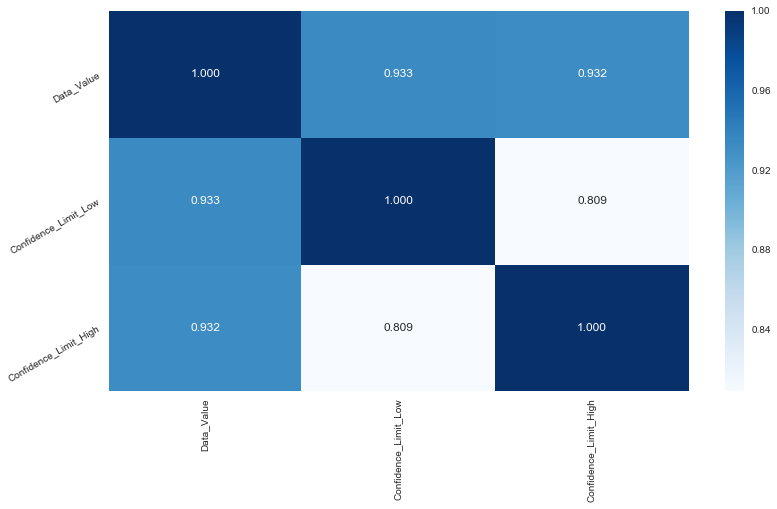

In [372]:
pl.show()

In [373]:
claims["Disease_Topic"] = preprocessing.LabelEncoder().fit_transform(claims["Disease_Topic"])

In [374]:
claims["Disease_Indicator"] = preprocessing.LabelEncoder().fit_transform(claims["Disease_Indicator"])

In [375]:
claims["Breakout_Category"] = preprocessing.LabelEncoder().fit_transform(claims["Breakout_Category"])

In [376]:
claims["Breakout_Variables"] = preprocessing.LabelEncoder().fit_transform(claims["Breakout_Variables"])

In [377]:
corr = claims.corr()
s.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 24})
pl.figure(figsize=(13,7))
a = s.heatmap(corr, annot=True, fmt='.3f',cmap="Blues")
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

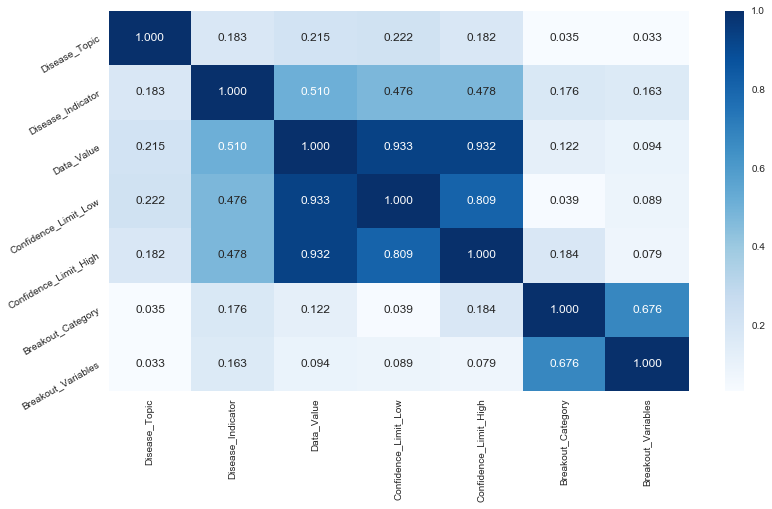

In [378]:
pl.show()

In [379]:
claims = claims.dropna(axis=0).reset_index(drop=True)

In [380]:
claims

,Disease_Topic,Disease_Indicator,Data_Value,Confidence_Limit_Low,Confidence_Limit_High,Breakout_Category,Breakout_Variables,Topic_ID,Indicator_ID,Breakout_Category_ID,Breakout_ID
0,4,5,27.0,26.8,27.2,2,8,T1,MD101,BOC01,OVR01
1,4,5,30.7,30.4,31.0,1,4,T1,MD101,BOC02,GEN01
2,4,5,24.4,24.2,24.6,1,2,T1,MD101,BOC02,GEN02
3,4,5,27.1,26.8,27.4,0,0,T1,MD101,BOC03,AGE06
4,4,5,26.9,26.7,27.1,0,1,T1,MD101,BOC03,AGE08
5,4,5,26.7,26.5,26.9,3,6,T1,MD101,BOC04,RAC01
6,4,5,28.2,27.7,28.6,3,5,T1,MD101,BOC04,RAC02
7,4,5,27.2,19.4,35.0,3,3,T1,MD101,BOC04,RAC04
8,4,5,27.5,25.1,29.8,3,7,T1,MD101,BOC04,RAC07
9,4,5,25.1,24.2,25.9,2,8,T1,MD101,BOC01,OVR01


In [381]:
claims['Index'] = range(len(claims))

In [382]:
diff = claims["Confidence_Limit_High"] - claims["Confidence_Limit_Low"]

In [383]:
diff

0         0.4
1         0.6
2         0.4
3         0.6
4         0.4
5         0.4
6         0.9
7        15.6
8         4.7
9         1.7
10        2.7
11        2.1
12        2.5
13        2.4
14        2.1
15       11.7
16       27.5
17        3.1
18        0.5
19        0.7
20        0.6
21        0.8
22        0.6
23        0.5
24        3.4
25        3.0
26        2.0
27        0.5
28        0.8
29        0.5
         ... 
40966     0.4
40967     0.3
40968     1.5
40969     3.5
40970     0.2
40971     0.3
40972     0.2
40973     0.3
40974     0.2
40975     0.2
40976     0.9
40977     3.1
40978     1.4
40979     0.6
40980     0.9
40981     0.8
40982     0.8
40983     0.9
40984     0.6
40985    10.5
40986     3.7
40987     0.0
40988     0.0
40989     0.0
40990     0.0
40991     0.1
40992     0.0
40993     0.1
40994     0.1
40995     0.1
Length: 40996, dtype: float64

In [384]:
threshold = diff.mean()

In [385]:
for i in range(40996):
    if (diff[i] > 3.5):
        claims.drop(claims.Index[i], inplace = True)

In [386]:
claims

,Disease_Topic,Disease_Indicator,Data_Value,Confidence_Limit_Low,Confidence_Limit_High,Breakout_Category,Breakout_Variables,Topic_ID,Indicator_ID,Breakout_Category_ID,Breakout_ID,Index
0,4,5,27.0,26.8,27.2,2,8,T1,MD101,BOC01,OVR01,0
1,4,5,30.7,30.4,31.0,1,4,T1,MD101,BOC02,GEN01,1
2,4,5,24.4,24.2,24.6,1,2,T1,MD101,BOC02,GEN02,2
3,4,5,27.1,26.8,27.4,0,0,T1,MD101,BOC03,AGE06,3
4,4,5,26.9,26.7,27.1,0,1,T1,MD101,BOC03,AGE08,4
5,4,5,26.7,26.5,26.9,3,6,T1,MD101,BOC04,RAC01,5
6,4,5,28.2,27.7,28.6,3,5,T1,MD101,BOC04,RAC02,6
9,4,5,25.1,24.2,25.9,2,8,T1,MD101,BOC01,OVR01,9
10,4,5,30.1,28.7,31.4,1,4,T1,MD101,BOC02,GEN01,10
11,4,5,20.8,19.8,21.9,1,2,T1,MD101,BOC02,GEN02,11


In [387]:
claims.reset_index(drop = True, inplace = True)

In [30]:
claims

,Disease_Topic,Disease_Indicator,Data_Value,Confidence_Limit_Low,Confidence_Limit_High,Breakout_Category,Breakout_Variables,Topic_ID,Indicator_ID,Breakout_Category_ID,Breakout_ID,Index
0,4,5,27.0,26.8,27.2,2,8,T1,MD101,BOC01,OVR01,0
1,4,5,30.7,30.4,31.0,1,4,T1,MD101,BOC02,GEN01,1
2,4,5,24.4,24.2,24.6,1,2,T1,MD101,BOC02,GEN02,2
3,4,5,27.1,26.8,27.4,0,0,T1,MD101,BOC03,AGE06,3
4,4,5,26.9,26.7,27.1,0,1,T1,MD101,BOC03,AGE08,4
5,4,5,26.7,26.5,26.9,3,6,T1,MD101,BOC04,RAC01,5
6,4,5,28.2,27.7,28.6,3,5,T1,MD101,BOC04,RAC02,6
7,4,5,25.1,24.2,25.9,2,8,T1,MD101,BOC01,OVR01,9
8,4,5,30.1,28.7,31.4,1,4,T1,MD101,BOC02,GEN01,10
9,4,5,20.8,19.8,21.9,1,2,T1,MD101,BOC02,GEN02,11


In [32]:
corr = claims.corr()
corr

,Disease_Topic,Disease_Indicator,Data_Value,Confidence_Limit_Low,Confidence_Limit_High,Breakout_Category,Breakout_Variables,Index
Disease_Topic,1.000000,0.148034,0.241105,0.240599,0.241300,0.005876,0.023584,0.477309
Disease_Indicator,0.148034,1.000000,0.444577,0.436210,0.451983,0.096613,0.153581,0.176562
Data_Value,0.241105,0.444577,1.000000,0.999235,0.999279,0.027021,0.083759,-0.195239
Confidence_Limit_Low,0.240599,0.436210,0.999235,1.000000,0.997055,0.015063,0.078556,-0.204789
Confidence_Limit_High,0.241300,0.451983,0.999279,0.997055,1.000000,0.038627,0.088689,-0.185708
Breakout_Category,0.005876,0.096613,0.027021,0.015063,0.038627,1.000000,0.768264,0.083637
Breakout_Variables,0.023584,0.153581,0.083759,0.078556,0.088689,0.768264,1.000000,0.101584
Index,0.477309,0.176562,-0.195239,-0.204789,-0.185708,0.083637,0.101584,1.000000


In [34]:
claims.loc[claims["Breakout_Variables"] == 3]

,Disease_Topic,Disease_Indicator,Data_Value,Confidence_Limit_Low,Confidence_Limit_High,Breakout_Category,Breakout_Variables,Topic_ID,Indicator_ID,Breakout_Category_ID,Breakout_ID,Index
21,4,5,28.9,27.4,30.4,3,3,T1,MD101,BOC04,RAC04,25
37,4,5,24.7,24.3,25.2,3,3,T1,MD101,BOC04,RAC04,43
45,4,5,22.3,20.6,23.9,3,3,T1,MD101,BOC04,RAC04,52
74,4,5,25.0,24.5,25.6,3,3,T1,MD101,BOC04,RAC04,88
103,4,5,25.2,24.0,26.4,3,3,T1,MD101,BOC04,RAC04,124
223,4,5,28.2,27.1,29.2,3,3,T1,MD101,BOC04,RAC04,276
231,4,5,23.7,22.4,25.0,3,3,T1,MD101,BOC04,RAC04,285
240,4,5,24.0,23.4,24.6,3,3,T1,MD101,BOC04,RAC04,294
319,4,5,27.3,26.9,27.7,3,3,T1,MD101,BOC04,RAC04,393
377,4,5,26.1,25.9,26.3,3,3,T1,MD101,BOC04,RAC04,464


In [315]:
claims_65over = claims[claims['Breakout_Variables'] == 0]
claims_75over = claims[claims['Breakout_Variables'] == 1]
claims_female = claims[claims['Breakout_Variables'] == 2]
claims_hispanic = claims[claims['Breakout_Variables'] == 3]
claims_male = claims[claims['Breakout_Variables'] == 4]
claims_nonhisblack = claims[claims['Breakout_Variables'] == 5]
claims_nonhiswhite = claims[claims['Breakout_Variables'] == 6]
claims_other = claims[claims['Breakout_Variables'] == 7]
claims_overall = claims[claims['Breakout_Variables'] == 8]

In [328]:
claimsessential = claims.drop(["Confidence_Limit_Low", "Confidence_Limit_High", "Breakout_Category" , "Topic_ID" , "Indicator_ID" , "Breakout_Category_ID" , "Breakout_ID" , "Index"], axis = 1)

In [329]:
claimsessential
claimsessential["Data_Value"].round(0)
claimsessential["Data_Value"] = claimsessential["Data_Value"].astype(int)

In [330]:
claimsessential

,Disease_Topic,Disease_Indicator,Data_Value,Breakout_Variables
0,4,5,27,8
1,4,5,30,4
2,4,5,24,2
3,4,5,27,0
4,4,5,26,1
5,4,5,26,6
6,4,5,28,5
7,4,5,25,8
8,4,5,30,4
11,4,5,25,1


In [331]:
target = claimsessential.Data_Value

In [332]:
training = claimsessential.drop(["Data_Value"], axis = 1)

In [333]:
from sklearn import cross_validation

In [334]:
x_train,x_test,y_train,y_test = cross_validation.train_test_split( training, target , test_size = 0.2, random_state = 0)

In [335]:
from sklearn.tree import DecisionTreeClassifier

In [336]:
model = DecisionTreeClassifier(max_depth=20, min_samples_split=2,random_state=0,min_samples_leaf=5)

In [337]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [338]:
y_pred = model.predict(x_test)

In [349]:
x = model.score(x_test,y_test)

In [350]:
x

0.33903034530868503